In [1]:
import trompy as tp
import numpy as np
import csv
%matplotlib inline
from datetime import datetime

In [19]:
def get_FEDevents(filename, eventname):
    
    file = open (filename)
    csvreader= csv.reader(file)
    header = []
    header = next(csvreader)
    rows= []
    for row in csvreader:
        rows.append(row)
    timestamps = []
    for row in rows: 
        if row[7] == eventname:
            date_time_obj = datetime.strptime(row [0], '%m/%d/%Y %H:%M:%S')
            timestamps.append (date_time_obj)
           
    t0 = rows[0] [0] 
    day = t0.split()[0] 
    lightson = day + " 07:00:00" 
    refpoint = datetime.strptime(lightson, '%m/%d/%Y %H:%M:%S')
    
                
    pellettimes = []
    for t in timestamps:
        Deltat = t-refpoint
        Deltatinseconds = Deltat.total_seconds()
        Deltatinhours = Deltatinseconds/3600
        pellettimes.append(Deltatinhours)
    return pellettimes

In [20]:
metafile = "FEDP Mice Data Sheet Updated .xls"

metafile

In [21]:
metafilerows , metafileheader = tp.metafilereader(metafile, sheetname="MetaFile")

File is excel file. Making csv metafile first


In [22]:
metafileheader

['fedfile', 'mouse', 'diet', 'mode', 'sex', 'order']

In [23]:
metafilerows

[['FED001_121721_01.CSV', 'FEDP01', 'grain', 'FF', 'M', 2.0],
 ['FED001_122321_00.CSV', 'FEDP01', 'PR', 'FF', 'M', 2.0],
 ['FED001_123021_00.CSV', 'FEDP01', 'NR', 'FF', 'M', 2.0],
 ['FED002_121721_01.CSV', 'FEDP02', 'grain', 'FF', 'M', 1.0],
 ['FED002_123021_00MERGED.CSV', 'FEDP02', 'PR', 'FF', 'M', 1.0],
 ['FED002_122321_00.CSV', 'FEDP02', 'NR', 'FF', 'M', 1.0],
 ['FED003_121721_02.CSV', 'FEDP03', 'grain', 'FF', 'M', 2.0],
 ['FED003_122321_00.CSV', 'FEDP03', 'PR', 'FF', 'M', 2.0],
 ['FED003_123021_00MERGED.CSV', 'FEDP03', 'NR', 'FF', 'M', 2.0],
 ['FED004_121721_01.CSV', 'FEDP04', 'grain', 'FF', 'M', 1.0],
 ['FED004_123021_00.CSV', 'FEDP04', 'PR', 'FF', 'M', 1.0],
 ['FED004_122321_00.CSV', 'FEDP04', 'NR', 'FF', 'M', 1.0],
 ['FED005_121721_04.CSV', 'FEDP05', 'grain', 'FF', 'M', 2.0],
 ['FED005_122321_00.CSV', 'FEDP05', 'PR', 'FF', 'M', 2.0],
 ['FED005_123021_00MERGED.CSV', 'FEDP05', 'NR', 'FF', 'M', 2.0],
 ['FED006_121721_04MERGED.CSV', 'FEDP06', 'grain', 'FF', 'M', 1.0],
 ['FED006_1230

In [24]:
grain=[]
PR=[]
NR=[]

for mfr in metafilerows:
    filename= mfr[0]
    folder = "data\\"
    fullfile = folder + filename
    file = open (fullfile)
    csvreader= csv.reader(file)
    header = []
    header = next(csvreader)
    header
    rows= []
    for row in csvreader:
        rows.append(row)
    
    numberofpellets = 0
    for row in rows: 
        if row[7] == "Pellet":
            numberofpellets=numberofpellets+1
    print(numberofpellets)
    
    print (mfr[2])
    
    if mfr[2] == "grain":
        grain.append(numberofpellets)
        

    
    if mfr[2] == "PR":
        PR.append(numberofpellets)
        
    
    if mfr[2] == "NR":
        NR.append(numberofpellets)
         
print (grain,NR,PR)
            


    

    
    

1383
grain
1240
PR
1200
NR
1053
grain
1362
PR
1081
NR
1284
grain
1308
PR
1209
NR
1397
grain
1581
PR
1339
NR
1298
grain
1315
PR
1447
NR
1494
grain
1590
PR
1260
NR
515
grain
325
grain
494
grain
495
grain
303
grain
382
grain
433
grain
307
grain
416
grain
518
grain
315
grain
414
grain
588
grain
343
grain
543
grain
694
grain
352
grain
554
grain
[1383, 1053, 1284, 1397, 1298, 1494, 515, 325, 494, 495, 303, 382, 433, 307, 416, 518, 315, 414, 588, 343, 543, 694, 352, 554] [1200, 1081, 1209, 1339, 1447, 1260] [1240, 1362, 1308, 1581, 1315, 1590]


In [25]:
PRFF=[]
for row in metafilerows:
    if row [2] == "PR":
        if row[3] =="FF":
            filename = row[0]
            x= get_FEDevents ("data\\{}".format(filename) , "Pellet")
            PRFF.append(x)
    
grainFF=[]
for row in metafilerows:
    if row [2] == "grain":
        if row[3] =="FF":
            filename = row[0]
            x= get_FEDevents ("data\\{}".format(filename) , "Pellet")
            grainFF.append(x)
            
NRFF=[]
for row in metafilerows:
    if row[2] == "NR":
        if row[3] =="FF":
            filename = row[0]
            x= get_FEDevents ("data\\{}".format(filename) , "Pellet")
            NRFF.append(x)          
        
            
      


In [26]:
def get_intermealinterval (pellettimes):
    IPIs = np.diff(pellettimes)
    IMI= np.mean([x for x in IPIs if x > (1/60)])
    return IMI
    

In [27]:
PRFF [0]
get_intermealinterval (PRFF [0])

0.4240991960953202

In [109]:
len (PRFF[0])
pellettimes= PRFF[0]
IPIs = np.diff(pellettimes)

<ipython-input-113-0a912f514869>:7: RuntimeWarning: divide by zero encountered in log10
  y = [np.log10(val) for val in y ]
C:\Users\hta031\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

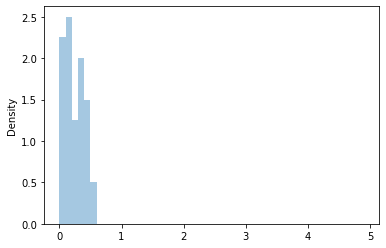

In [113]:
import seaborn as sns

div = 5/50
bins = [i*div for i in range(50)]
ax.set_xlim(-100,1000)
y = IPIs
y = [np.log10(val) for val in y ]
f,ax= plt.subplots ()
sns.distplot(y,bins=bins,ax=ax,norm_hist=False,
             kde=True)

In [11]:
get_intermealinterval([0,1,2,3,5,7,9,13,15])

1.875

In [15]:
for mouse in PRFF:
    IMI= get_intermealinterval (mouse)
    print (IMI)

0.4240991960953202
0.39864954153182314
0.3927231548094858
0.25978737453777095
0.5744600938967136
0.4707580851745122


In [16]:
for mouse in NRFF:
    IMI= get_intermealinterval (mouse)
    print (IMI)

0.3719588663155254
0.34377174669450233
0.4674738841405509
0.26272311111111096
0.461944444444445
0.3743840579710148


In [102]:
def get_mealsize(pellettimes):
    """
    calculates meal size from times of pellets
    parameters 
    ----------
    pellettimes : list of floats
        timestamps of pellet deliveries

    returns
    --------
    mealsize : float 
        mean size of meal in pellets 
    """

        
    npellets = len(pellettimes)
    IPIs = np.diff(pellettimes)
    nmeals = len([idx for idx, val in enumerate(IPIs) if val > 1/60])
    mealsize = npellets/nmeals

    return mealsize
    

In [18]:
PRFF [0]
get_mealsize (PRFF [0])

3.204134366925065

In [103]:
get_mealsize?

Signature: get_mealsize(pellettimes)
Docstring:
calculates meal size from times of pellets
parameters 
----------
pellettimes : list of floats
    timestamps of pellet deliveries

returns
--------
mealsize : float 
    mean size of meal in pellets 
File:      c:\users\hta031\github\fed-ff\<ipython-input-102-806c738524ca>
Type:      function


In [29]:
PR_mealsize=[]
NR_mealsize=[]


for mouse in PRFF:
    mealsize= get_mealsize (mouse)
    
    PR_mealsize.append(mealsize)

    
print ("##################")    

    
    
for mouse in NRFF:
    mealsize= get_mealsize (mouse)
    NR_mealsize.append(mealsize)
    

    

##################


Text(0.5, 0, 'Diet')

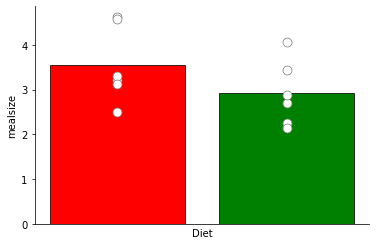

In [30]:
import matplotlib.pyplot as plt
f,ax= plt.subplots ()
tp.barscatter([PR_mealsize, NR_mealsize], ax=ax, barfacecolor= ["red", "green"],barfacecoloroption= "individual")
ax.set_ylabel("mealsize")
ax.set_xlabel("Diet")

In [41]:
tp.barscatter?

Signature:
tp.barscatter(
    data,
    transpose=False,
    groupwidth=0.75,
    barwidth=0.8,
    paired=False,
    unequal=False,
    spaced=False,
    yspace=20,
    xspace=0.1,
    barfacecoloroption='same',
    barfacecolor=['white'],
    baredgecoloroption='same',
    baredgecolor=['black'],
    baralpha=1,
    scatterfacecoloroption='same',
    scatterfacecolor=['white'],
    scatteredgecoloroption='same',
    scatteredgecolor=['grey'],
    scatterlinecolor='grey',
    scattersize=80,
    scatteralpha=1,
    spreadscatters=False,
    linewidth=0.75,
    xlim=[],
    ylim=[],
    ylabel='none',
    xlabel='none',
    grouplabel='auto',
    itemlabel='none',
    barlabels=[],
    barlabeloffset=0.025,
    grouplabeloffset=0,
    yaxisparams='auto',
    show_legend='none',
    legendloc='upper right',
    xfontsize=8,
    ax=[],
)
Docstring:
Description: Creates a bar graph with data points shown as overlaid circles.

Args:
    data - Required. Should be a list (or list of lists) 

Text(0.5, 0, 'Diet')

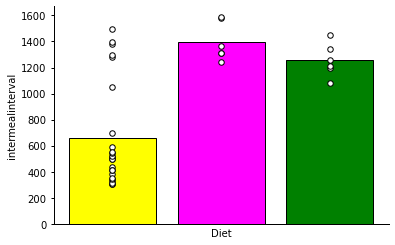

In [93]:
f,ax= plt.subplots ()
tp.barscatter([grain,PR,NR], ax=ax, barfacecolor= ["yellow", "magenta", "green"],barfacecoloroption= "individual", linewidth=1, scattersize=30, scatteredgecolor="k")
ax.set_ylabel("intermealinterval")
ax.set_xlabel("Diet")


In [68]:
f.savefig("C:\\Users\\hta031\OneDrive - UiT Office 365\\Documents\\People\\Hamid\\Presentations\\SSIB2022\\Poster\\Fig\\intermealinterval.eps")

In [37]:
dir(f)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_axes_internal',
 '_agg_filter',
 '_align_xlabel_grp',
 '_align_ylabel_grp',
 '_alpha',
 '_animated',
 '_axobservers',
 '_axstack',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_constrained',
 '_constrained_layout_pads',
 '_contains',
 '_default_contains',
 '_dpi',
 '_gci',
 '_get_clipping_extent_bbox',
 '_get_dpi',
 '_gid',
 '_gridspecs',
 '_in_layout',
 '_label',
 '_layoutbox',
 '_make_key',
 '_mouseover',
 '_normalize_grid_string',
 '_oid',
 '_path_effects',
 '_picker',
 '_process_projection_requirements',
 '_propobservers',
 '_rasterized',
 '_remove_method',
 '_repr_html_',
 '

In [24]:
def sayhello (name, language="english"):
    if language == "english":
        print("hello", name)
    elif language == "deutsch":
        print("hallo", name)
    elif language == "Norsk":
        print("Hei", name)
    elif language == "Martian":
        print("#%¤&/", name)
        
    else:
        print("I do not know the language", language, name)

In [25]:
sayhello("Jaime", language = "Norsk")
sayhello("jaime", language = "deutsch")
sayhello("Jaime", language = "Persian")
sayhello("jaime", language= "Martian")

Hei Jaime
hallo jaime
I do not know the language Persian Jaime
#%¤&/ jaime


In [26]:
sayhello ("FED")
answer = sayhello ("FED")


hello FED
hello FED


In [27]:
def squared(number):
    result = number**2
    return result

In [53]:
a= squared(3)
a*2

18

In [54]:
a

9

In [28]:
x= get_FEDevents("data\\FED005_122321_00.CSV")

TypeError: get_FEDevents() missing 1 required positional argument: 'eventname'

In [140]:
x
len(x)

1315

In [141]:
x

[4.368333333333333,
 4.3694444444444445,
 4.4655555555555555,
 4.465833333333333,
 5.815,
 5.8213888888888885,
 5.825833333333334,
 5.8308333333333335,
 5.835555555555556,
 5.84,
 5.845277777777778,
 7.590277777777778,
 7.595277777777778,
 7.599444444444444,
 7.599444444444444,
 7.604166666666667,
 7.608888888888889,
 7.613333333333333,
 8.98611111111111,
 8.990833333333333,
 8.994722222222222,
 8.998888888888889,
 9.003333333333334,
 9.007777777777777,
 9.011388888888888,
 9.015555555555556,
 10.26388888888889,
 10.265833333333333,
 10.269722222222223,
 10.273055555555555,
 10.276944444444444,
 10.281944444444445,
 10.285833333333333,
 10.29111111111111,
 11.3575,
 11.361666666666666,
 11.366111111111111,
 11.37,
 11.374444444444444,
 11.379722222222222,
 12.305833333333334,
 12.306111111111111,
 12.309444444444445,
 12.313611111111111,
 12.31861111111111,
 12.322777777777778,
 12.326666666666666,
 12.331111111111111,
 12.33611111111111,
 12.340277777777779,
 12.344166666666666,
 12.6

In [142]:
t0= row[0]
day = t0.split()[0]
lightson = day + " 07:00:00"
refpoint = datetime.timedelta.strptime(lightson, "%m/%d/%Y %H:%M:%S")


AttributeError: type object 'datetime.datetime' has no attribute 'timedelta'

In [131]:
x

NameError: name 'x' is not defined

In [132]:
datetime.strptime("12/23/2021 07:00:00", "%m/%d/%Y")

ValueError: unconverted data remains:  07:00:00